In [1]:
import numpy as np
import pandas as pd

## Seed Function
    1. Every time we run program randint() we get a new set of randint() in order to fixed this random number geberation we provide seed value. 

In [2]:
arr = np.random.randint(1,100,10)
arr

array([42,  3, 84, 36, 13, 42, 73,  8, 78, 17])

In [3]:
np.random.seed(12)
arr = np.random.randint(1,100,10)
arr

array([76, 28,  7,  3,  4, 68, 77, 49, 23, 50])

In [4]:
np.random.seed(5)
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1,cov_mat1,20)


df_1 = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])

df_1['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2,cov_mat2,20)


df_2 = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])

df_2['target'] = 0

# df_1 = df_1.append(df_2, ignore_index = True) append is depreciated
df_1 = pd.concat([df_1,df_2],ignore_index=True)
df_1 = df_1.sample(40)

In [5]:
df_1.head()

,feature1,feature2,feature3,target
12,0.197660,1.334849,-0.086876,1
2,-0.909232,-0.591637,0.187603,1
27,-0.856853,-0.871879,-0.422508,0
30,0.793053,-0.631572,-0.006195,0
34,0.100738,0.355438,0.269612,0


## Plotly is used for repersenting data in 3D

In [6]:
# ! pip install plotly

In [7]:
! pip install nbformat

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from plotly import express as px
#fig = px.scatter_3d(df, x=df['feature1'], y =df['feature2'], z = df['feature3'], color=df['target'].astype('str'))
fig = px.scatter_3d(df_1, x="feature1", y="feature2",z ="feature3",color="target",
                 title="String 'Target' values discrete colors")
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))

fig.show()


## Step 1: Mean Centering

In [10]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

df_1.iloc[:,0:3] = scale.fit_transform(df_1.iloc[:,0:3])

## Step 2: Covarience Matrix

In [16]:
covarience_matrix = np.cov([df_1.iloc[:,0],df_1.iloc[:,1],df_1.iloc[:,3]])
print('Covarience Matrix :\n ',covarience_matrix)

Covarience Matrix :
  [[1.02564103e+00 1.01022825e-01 2.84672570e-18]
 [1.01022825e-01 1.02564103e+00 1.13869028e-17]
 [2.84672570e-18 1.13869028e-17 2.56410256e-01]]


## Step 3: Find eigen value and eigen vector.

In [17]:
eigen_values, eigen_vectors = np.linalg.eig(covarience_matrix)

In [18]:
eigen_values

array([0.9246182 , 1.12666385, 0.25641026])

In [19]:
eigen_vectors

array([[-7.07106781e-01,  7.07106781e-01, -1.78750367e-18],
       [ 7.07106781e-01,  7.07106781e-01, -1.45682214e-17],
       [ 1.99255866e-17,  1.99255866e-17,  1.00000000e+00]])

[-7.07106781e-01  7.07106781e-01  1.99255866e-17]
[7.07106781e-01 7.07106781e-01 1.99255866e-17]
[-1.78750367e-18 -1.45682214e-17  1.00000000e+00]


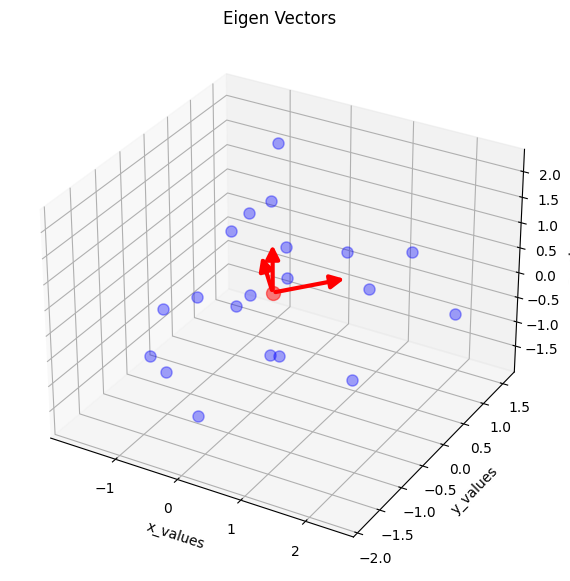

In [48]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self,xs,ys,zs,*args,**kwargs):
        FancyArrowPatch.__init__(self,(0,0),(0,0),*args,**kwargs)
        self._verts3d = xs,ys,zs
    
    # def draw(self,renderer):
    #     xs3d,ys3d,zs3d = self._verts3d
    #     xs , ys, zs = proj3d.proj_transform(xs3d,ys3d,zs3d,renderer.M)
    #     self.set_positions(xs[0],ys[0],(xs[1],ys[1]))
    #     FancyArrowPatch.draw(self,renderer)
    
    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        return np.min(zs)

    



fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')

ax.plot(df_1['feature1'],df_1['feature2'],df_1['feature3'],'o',markersize=8,color='blue',alpha=0.2)
ax.plot([df_1['feature1'].mean()],[df_1['feature2'].mean()],[df_1['feature3'].mean()],'o',markersize=10,color='red',alpha=0.5)

for v in eigen_vectors.T:
    print(v)
for v in eigen_vectors.T:
    a = Arrow3D([df_1['feature1'].mean(),v[0]], 
                [df_1['feature2'].mean(),v[1]],               
                [df_1['feature3'].mean(),v[2]],                 
                mutation_scale=20,lw=3, arrowstyle="-|>",color='r')
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigen Vectors')

plt.show()
    


In [50]:
pc = eigen_vectors[0:2]
pc

array([[-7.07106781e-01,  7.07106781e-01, -1.78750367e-18],
       [ 7.07106781e-01,  7.07106781e-01, -1.45682214e-17]])

In [54]:
df_1.iloc[:,0:3].shape

(40, 3)

In [55]:
pc.T.shape

(3, 2)

In [53]:
transformed_df = np.dot(df_1.iloc[:,0:3],pc.T)

new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df_1['target'].values

new_df.head()

,PC1,PC2,target
0,1.005109,1.192360,1
1,0.126138,-1.424196,1
2,-0.169219,-1.637328,0
3,-1.246205,-0.124314,0
4,0.192633,0.227737,0


In [56]:
from plotly import express as px
#fig = px.scatter_3d(df, x=df['feature1'], y =df['feature2'], z = df['feature3'], color=df['target'].astype('str'))
fig = px.scatter(new_df, x="PC1", y="PC2",color="target",color_discrete_sequence=px.colors.qualitative.G10)
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))

fig.show()
